In [4]:
import pickle
import numpy as np
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from tueplots import bundles


Function for plotting the temperature effect

In [5]:
def plot_temp_effect_from_file(path):
    with open(path, "rb") as f:
        results = pickle.load(f)
    observed = results["observed"]
    forecast = results["forecast"]
    hist = results["hist"]
    temps = observed["temps"]
    mean_temp = observed["global_mean_temp"]
    curves_observed = observed["curves"]
    curves_forecast = forecast["curves"]
    bins = hist["bins"]
    frac_observed = hist["frac_observed"]
    frac_forecast = hist["frac_forecast"]
    rain_levels = results["meta"]["rain_levels"]
    temp_min = results["meta"]["temp_min"]
    temp_max = results["meta"]["temp_max"]

    # ---- Plot ----
    plt.rcParams.update(bundles.icml2024(column="half", nrows=1, ncols=1))
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()
    
    ax2.set_zorder(0)
    ax1.set_zorder(1)
    ax1.patch.set_alpha(0)   # transparent so bars show through

    width = bins[1] - bins[0]
    ax2.patch.set_alpha(0)

    # Histogram bars
    h_observed = ax2.bar(
        bins[:-1], frac_observed,
        width=width, color="#808080", alpha=0.5,
        align="edge", zorder=0.5
    )
    h_forecast = ax2.bar(
        bins[:-1], frac_forecast,
        width=width, color="#E0E0E0", alpha=0.5,
        align="edge", zorder=0.5
    )

    ax2.set_ylabel("Fraction of data", fontsize=28, labelpad=10)
    ax2.set_ylim(0, max(frac_observed.max(), frac_forecast.max()) * 1.1)

    observed_colors = ["#084184", "#B23A8A", "#007A5A"]
    forecast_colors   = ["#418ac1", "#D46BAF", "#3FAF8A"]

    # Curves with CI
    for r, c_observed, c_forecast in zip(rain_levels, observed_colors, forecast_colors):
        # observed
        ax1.fill_between(
            temps,
            curves_observed[r]["low"],
            curves_observed[r]["high"],
            color=to_rgba(c_observed, 0.20),
            zorder=2
        )
        ax1.plot(
            temps,
            curves_observed[r]["mean"],
            lw=3,
            color=c_observed,
            label=f"Rain={r} mm (obs.)",
            zorder=3
        )

        # forecast
        ax1.fill_between(
            temps,
            curves_forecast[r]["low"],
            curves_forecast[r]["high"],
            color=to_rgba(c_forecast, 0.20),
            zorder=2.5
        )
        ax1.plot(
            temps,
            curves_forecast[r]["mean"],
            lw=3,
            color=c_forecast,
            label=f"Rain={r} mm (forecast.)",
            zorder=4
        )

    # Global mean temp line
    ax1.axvline(
        mean_temp,
        color="black",
        lw=2,
        ls="--",
        label=rf"Global mean temp $\approx$ {mean_temp:.1f}$^\circ$C",
        zorder=4
    )
    # Add text next to the line
    ax1.text(
        mean_temp + 0.5,  # slightly to the right of the line
        ax1.get_ylim()[1]*(-1.1),  # near top of y-axis
        rf"mean temp. $\approx$ {mean_temp:.1f}$^\circ$C",
        color="black",
        fontsize=22,
        ha="left",  # horizontal alignment
        va="top",   # vertical alignment
        rotation=0
    )
    # Labels, ticks, and axis limits
    ax1.set_xlabel("Temperature (°C)", fontsize=28)
    ax1.set_ylabel(r"Change in bike counts (\%)", fontsize=28, labelpad=10)
    ax1.set_yticks([-75, -50, -25, 0, 25, 50, 75])
    
    ax1.tick_params(axis='both', which='major', labelsize=24)
    ax2.tick_params(axis='y', which='major', labelsize=24)

    # Add margins at ends
    ax1.margins(x=0.02, y=0.05)

    # X-axis limits
    ax1.set_xlim(temp_min, temp_max)

    # Combine legends
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2 = [h_observed, h_forecast]
    labels2 = ["Observed temperature", "forecast temperature"]
    #ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper left", fontsize=14)

    #fig.savefig("../figures/forecast_vs_obs_wheather.pdf", format="pdf", bbox_inches="tight")
    plt.show()


Plot temperature effect

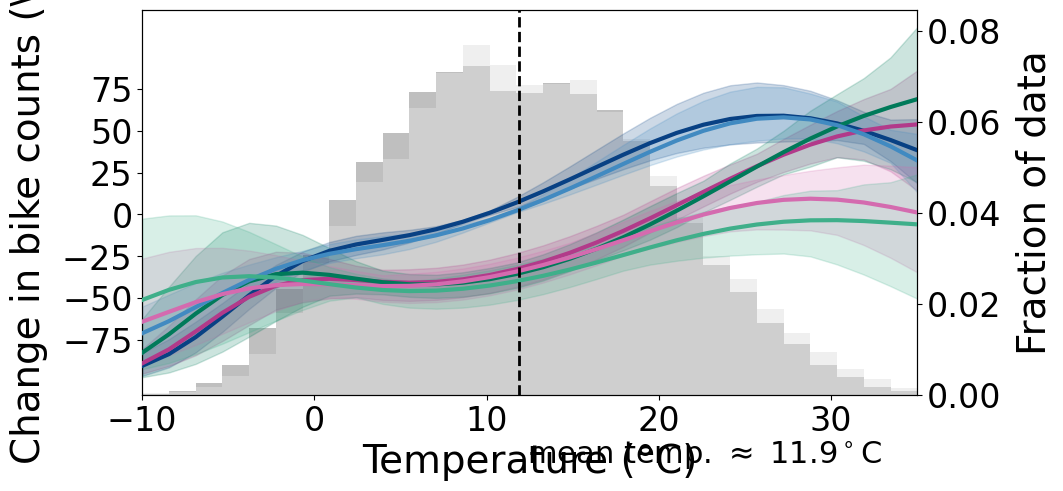

In [6]:
plot_temp_effect_from_file("../../data/temp_effect_results.pkl")

Function for plotting the rain curve

In [9]:
def plot_rain_effect_from_file(path):
    with open(path, "rb") as f:
        results = pickle.load(f)
    rain_grid = results["observed"]["rain_grid"]
    summary_observed = results["observed"]["curves"]
    summary_forecast   = results["forecast"]["curves"]
    bins = results["hist"]["bins"]
    frac_observed = results["hist"]["frac_observed"]
    frac_forecast   = results["hist"]["frac_forecast"]
    temps_fixed = results["meta"]["temps_fixed"]

    #--- Plot ---
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()

    # Force histograms into background
    ax2.set_zorder(0)
    ax1.set_zorder(1)
    ax1.patch.set_alpha(0)

    observed_colors = ["#084184", "#B23A8A", "#007A5A"]# blue, orange, green
    forecast_colors   = ["#418ac1", "#D46BAF", "#3FAF8A"]  # lighter variants

    # Rain effect curves with CIs
    for T, c_observed, c_forecast in zip(temps_fixed, observed_colors, forecast_colors):
        # observed
        ax1.fill_between(
            rain_grid,
            summary_observed[T]["low"],
            summary_observed[T]["high"],
            color=to_rgba(c_observed, 0.40),
            zorder=2,
        )
        ax1.plot(
            rain_grid,
            summary_observed[T]["mean"],
            lw=2.5,
            color=c_observed,
            label=f"T={T}°C (obs.)",
            zorder=3,
        )
        # forecast
        ax1.fill_between(
            rain_grid,
            summary_forecast[T]["low"],
            summary_forecast[T]["high"],
            color=to_rgba(c_forecast, 0.40),
            zorder=2.5,
        )
        ax1.plot(
            rain_grid,
            summary_forecast[T]["mean"],
            lw=2,
            color=c_forecast,
            label=f"T={T}°C (forecast)",
            zorder=4,
        )
    # -------------------------------------------------
    # Histogram (fractions)
    # -------------------------------------------------
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    width = bins[1] - bins[0]
    h_observed = ax2.bar(
            bin_centers,
            frac_observed,
            width=width,
            color="#808080",
            alpha=0.5,
            align="center",
            label="observed rain",
            zorder=1,
    )
    h_forecast = ax2.bar(
            bin_centers,
            frac_forecast,
            width=width,
            color="#E0E0E0",
            alpha=0.5,
            align="center",
            label="forecast rain",
            zorder=1,
    )
    ax2.set_ylabel("Fraction of all data points")
    ax2.set_ylim(0, max(frac_observed.max(), frac_forecast.max()) * 1.1)
    # -------------------------------------------------
    # Labels, legend, layout
    # -------------------------------------------------
    ax1.set_xlabel("Rain (mm)")
    ax1.set_ylabel("Bike count change relative to 0 mm rain (%)")
    #handles1, labels1 = ax1.get_legend_handles_labels()
    #handles2, labels2 = ax2.get_legend_handles_labels()
    #ax1.legend(
    #        handles1 + handles2,
    #        labels1 + labels2,
    #        loc="upper left",
    #)
    #ax1.set_title("Marginal effect of rain on bike counts\nobserved vs forecast Weather")
    plt.show()

Plot rain effect

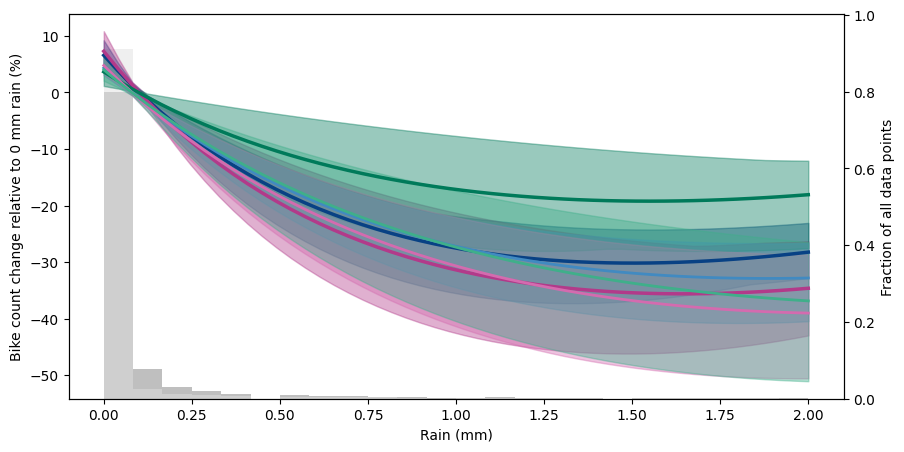

In [10]:
plot_rain_effect_from_file("../../data/rain_effect_results.pkl")